In [6]:
import numpy as np
import pandas as pd

In [7]:
from scipy.stats import rankdata

In [8]:
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing

In [9]:
import matplotlib.pyplot as plt

# 1. Load sc-RNA data

In [10]:
data = pd.read_table('write/VHL/kidney.tsv', sep='\t') # processed single cell RNA-seq data (Top 5000 highly variable genes)
data.shape

(5000, 89714)

In [11]:
members = [line.rstrip() for line in open('networks/VHLpathway_members.txt')] # VHL-centered subnetwork members
len(members)

2785

In [12]:
data = data.T
data.shape

(89714, 5000)

In [13]:
gene_in_mat = list(data.columns)

In [14]:
subnetwork = list(set(members) & set(gene_in_mat))
len(subnetwork)

768

In [15]:
subnetwork_mat = data[subnetwork]
subnetwork_mat

,NUAK1,BMF,SRSF7,LGR4,NFKB1,SKA3,CENPM,HIST3H2A,POMC,PLAT,...,HPGDS,CBLB,HNRNPH1,BRCA2,DBI,EPO,BCL6,AUNIP,RPL23A,CBX8
exp7-human-100well.AAATTCCTCTGCAGACCGGT,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
exp7-human-100well.CTCTACTGTATCATATTAG,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
exp7-human-100well.TCCTATAAGTCAACCGCTAA,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
exp7-human-100well.ACGACGCATTTCTTATCGA,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
exp7-human-100well.TATAAGGCTTGTCCTACTTG,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
exp7-human-274well.TTGACCAGTTTGACTTCAG,0.0,0.0,0.000000,2.45042,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.099481,0.0
exp7-human-274well.AAGTTCTTGTAGACTCAAGC,0.0,0.0,0.000000,0.00000,1.407669,0.0,0.0,0.0,0.0,0.0,...,0.0,1.407669,0.0,0.0,0.0,0.0,0.0,0.0,1.407669,0.0
exp7-human-274well.TTAATGAGCTAACCTGCGTA,0.0,0.0,3.282452,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.282452,0.0
exp7-human-274well.GAACGATGTCGGTCGTTAA,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.986409,0.0


In [16]:
expression_values = subnetwork_mat.values
expression_values.shape

(89714, 768)

# 2. Rank normalizing gene expression

In [17]:
ranked_expression_values = rankdata(expression_values, method='min', axis=1) # normalization per sample
ranked_expression_values

array([[  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       ...,
       [  1,   1, 748, ...,   1, 748,   1],
       [  1,   1,   1, ...,   1, 655,   1],
       [  1,   1,   1, ...,   1,   1,   1]])

In [13]:
n_comp = 15 # setting an upper bound of K

# 3. Performing PCA analysis to guide selection of k in following NMF

In [14]:
pca = PCA(n_components=n_comp)
pca.fit(ranked_expression_values)

PCA(n_components=15)

In [15]:
var = pd.Series(pca.explained_variance_ratio_, index=np.arange(1, n_comp+1))

# 4. Searching optimized K for NMF

## 4.1 cNMF

In [28]:
silhouette_scores = []
avg_errors = []

for k in range(2, n_comp+1):
    print('K={}'.format(k))
    
    many_H = []
    many_error = []
    
    for i in range(10):
        nmf_estimator = NMF(n_components=k, solver='cd', init='nndsvd', verbose=0, max_iter=5000)
        W = nmf_estimator.fit_transform(ranked_expression_values)
        H = nmf_estimator.components_
        
        L2_H = preprocessing.normalize(H, axis=1) # L2 normalization per program
        many_H.append(L2_H)
        
        many_error.append(nmf_estimator.reconstruction_err_)

    big_H = np.vstack(many_H)
    
    kmeans_model = KMeans(n_clusters=k, n_init='auto').fit(big_H)
    labels = kmeans_model.labels_
    silhouette_scores.append(metrics.silhouette_score(big_H, labels, metric='euclidean'))
    
    avg_errors.append(np.mean(many_error))

K=2
K=3
K=4
K=5
K=6
K=7
K=8
K=9
K=10
K=11
K=12
K=13
K=14
K=15


In [30]:
silhouette_scores_df = pd.Series(silhouette_scores, index=np.arange(2, n_comp+1))
err_df = pd.Series(avg_errors, index=np.arange(2, n_comp+1))

 ## 4.2 plot results

In [19]:
selected_k = 11 # mark selected K

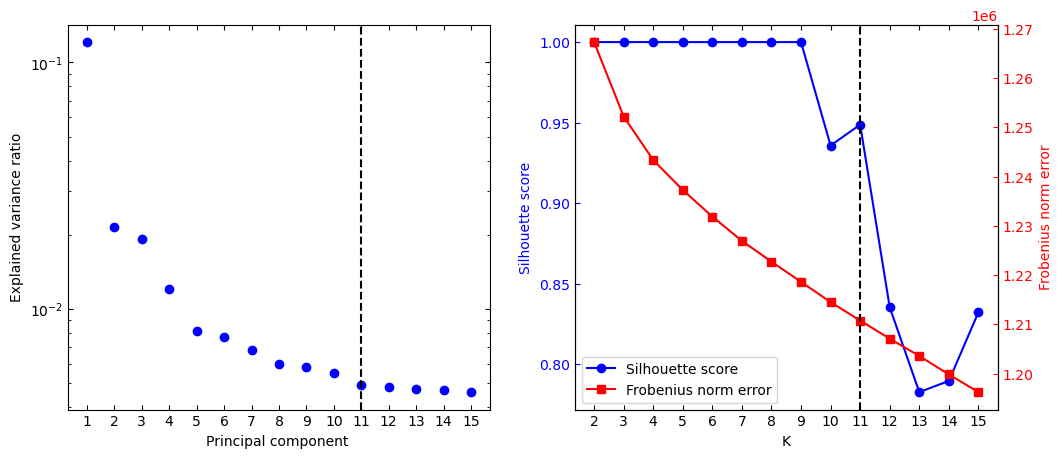

In [36]:
fig = plt.figure(figsize=(12,5))

# plot results of PCA analysis
ax1 = fig.add_subplot(1,2,1)
ax1.tick_params(axis='both', direction='in', right=True, top=True, which='both')

ax1.plot(var, 'o', color='blue')

ax1.set_xticks(np.arange(1, n_comp+1))

ax1.set_xlabel('Principal component ')
ax1.set_ylabel('Explained variance ratio')

ax1.set_yscale("log")

ax1.axvline(x=selected_k, linestyle='--', color='black')

# plot NMF stability analysis
ax2 = fig.add_subplot(1,2,2)

line2, = ax2.plot(silhouette_scores_df, 'o-', color='blue')

ax2.set_xticks(np.arange(2, n_comp+1))
ax2.set_xlabel('K')
ax2.set_ylabel('Silhouette score', color='blue')
ax2.tick_params(axis='y', direction='in', right=True, which='both', colors='blue')
ax2.tick_params(axis='x', direction='in', top=True, which='both')

# plot NMF error analysis
ax3 = ax2.twinx()
line3, = ax3.plot(err_df, 's-', color='red')

ax3.set_ylabel('Frobenius norm error', color='red')
ax3.tick_params(axis='y', direction='in',  which='both', colors='red')

ax3.legend(handles= [line2, line3], loc='lower left', labels=['Silhouette score', 'Frobenius norm error'])

ax3.axvline(x=selected_k, linestyle='--', color='black')

# save figures
plt.savefig("figures/VHL_kidney_K.pdf")

# 5. Run NMF last time to extract K gene expression programs

In [20]:
nmf_estimator = NMF(n_components=selected_k, solver='cd', init='nndsvd', verbose=0, random_state=1,  max_iter=5000)
W = nmf_estimator.fit_transform(ranked_expression_values)
H = nmf_estimator.components_

In [38]:
H_df = pd.DataFrame(H, index=['P'+str(x+1) for x in range(selected_k)], columns=subnetwork)

In [39]:
H_df.to_csv('write/VHL/VHL_kidney_GEPs.csv')

In [40]:
H_df = H_df.T

In [41]:
H_df.to_csv('write/VHL/VHL_kidney_GEPs_T.csv')

In [21]:
W_df = pd.DataFrame(W, index=data.index, columns=['P'+str(x+1) for x in range(selected_k)])

In [22]:
W_df.to_csv('write/VHL/VHL_kidney_NMF_W.csv')